# **Binarization**

In [1]:
pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 20.2 MB/s 
     |████████████████████████████████| 9.8 MB 48.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from feature_engine.wrappers import SklearnTransformerWrapper

In [3]:
# load the bag of words dataset
data = pd.read_csv("bag_of_words.csv")
data.head()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
plt.rcParams.update({'font.size': 15})

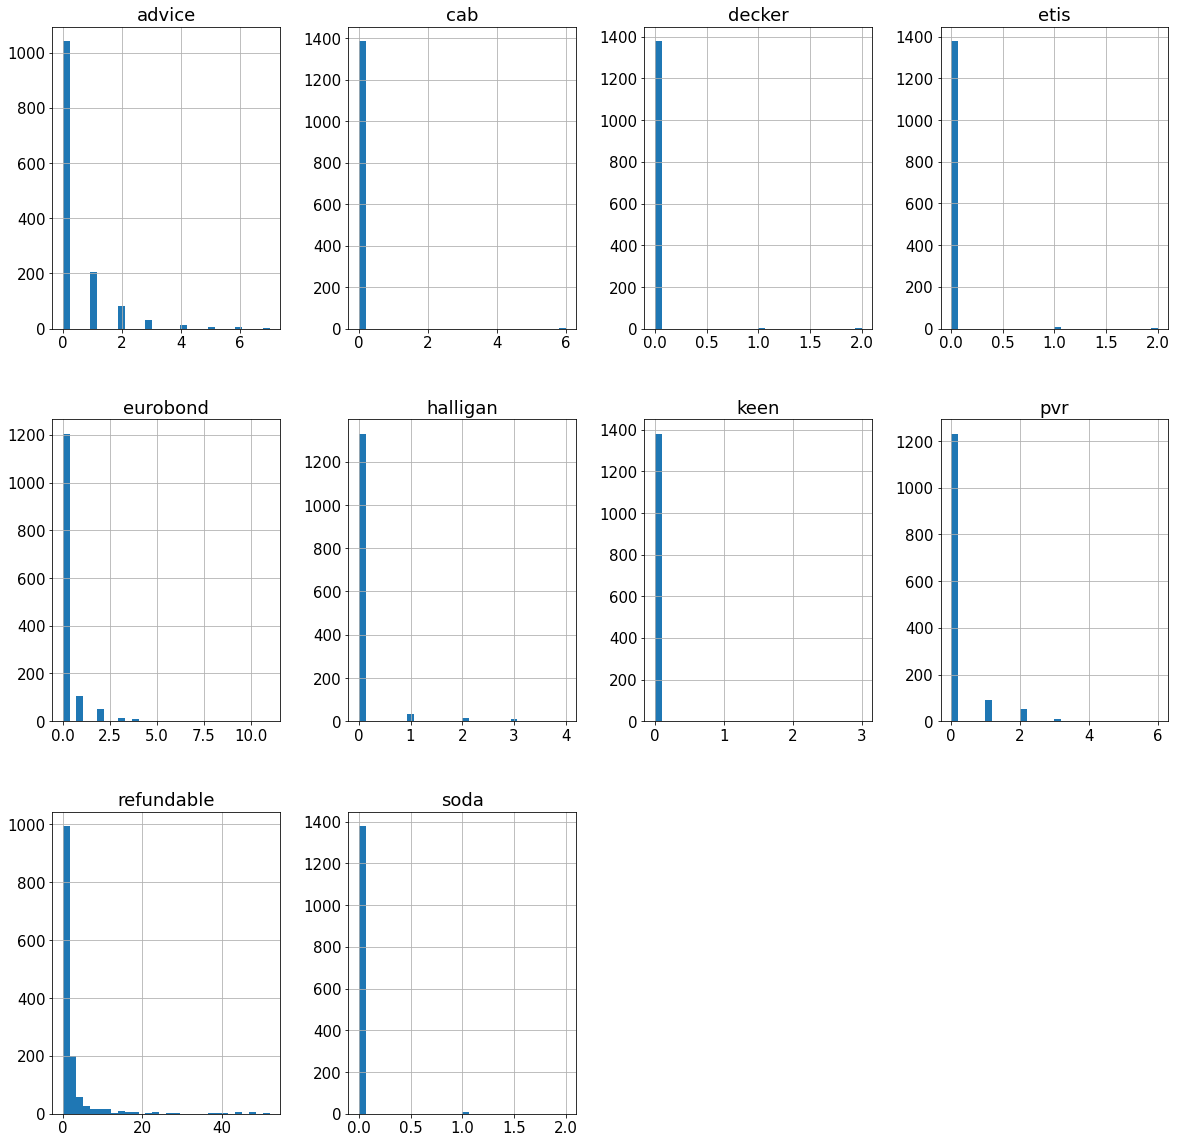

In [5]:
# Plot histograms to inspect variable distributions
data.hist(bins=30, figsize=(20, 20), layout=(3, 4))
plt.show()

In [6]:
data.nunique()

advice         8
cab            2
decker         3
etis           3
eurobond       7
halligan       5
keen           4
pvr            7
refundable    35
soda           3
dtype: int64

In [7]:
data.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.427954,0.008646,0.007925,0.007925,0.219020,0.072767,0.009366,0.177954,2.336455,0.007925
std,0.940093,0.227675,0.110426,0.103691,0.695758,0.394309,0.144294,0.581526,6.151411,0.096488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,7.000000,6.000000,2.000000,2.000000,11.000000,4.000000,3.000000,6.000000,52.000000,2.000000


In [8]:
# set up a Binarizer:
binarizer = Binarizer(threshold=0)

In [9]:
# Set up a wrapper
wrapper = SklearnTransformerWrapper(transformer=binarizer)

In [10]:
# fit to data
data_t = wrapper.fit_transform(data)

In [11]:
wrapper.variables_

['advice',
 'cab',
 'decker',
 'etis',
 'eurobond',
 'halligan',
 'keen',
 'pvr',
 'refundable',
 'soda']

In [12]:
data_t.describe()

,advice,cab,decker,etis,eurobond,halligan,keen,pvr,refundable,soda
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.249280,0.001441,0.005764,0.006484,0.131844,0.041787,0.005043,0.112392,0.505764,0.007205
std,0.432752,0.037946,0.075727,0.080292,0.338443,0.200174,0.070862,0.315962,0.500147,0.084604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


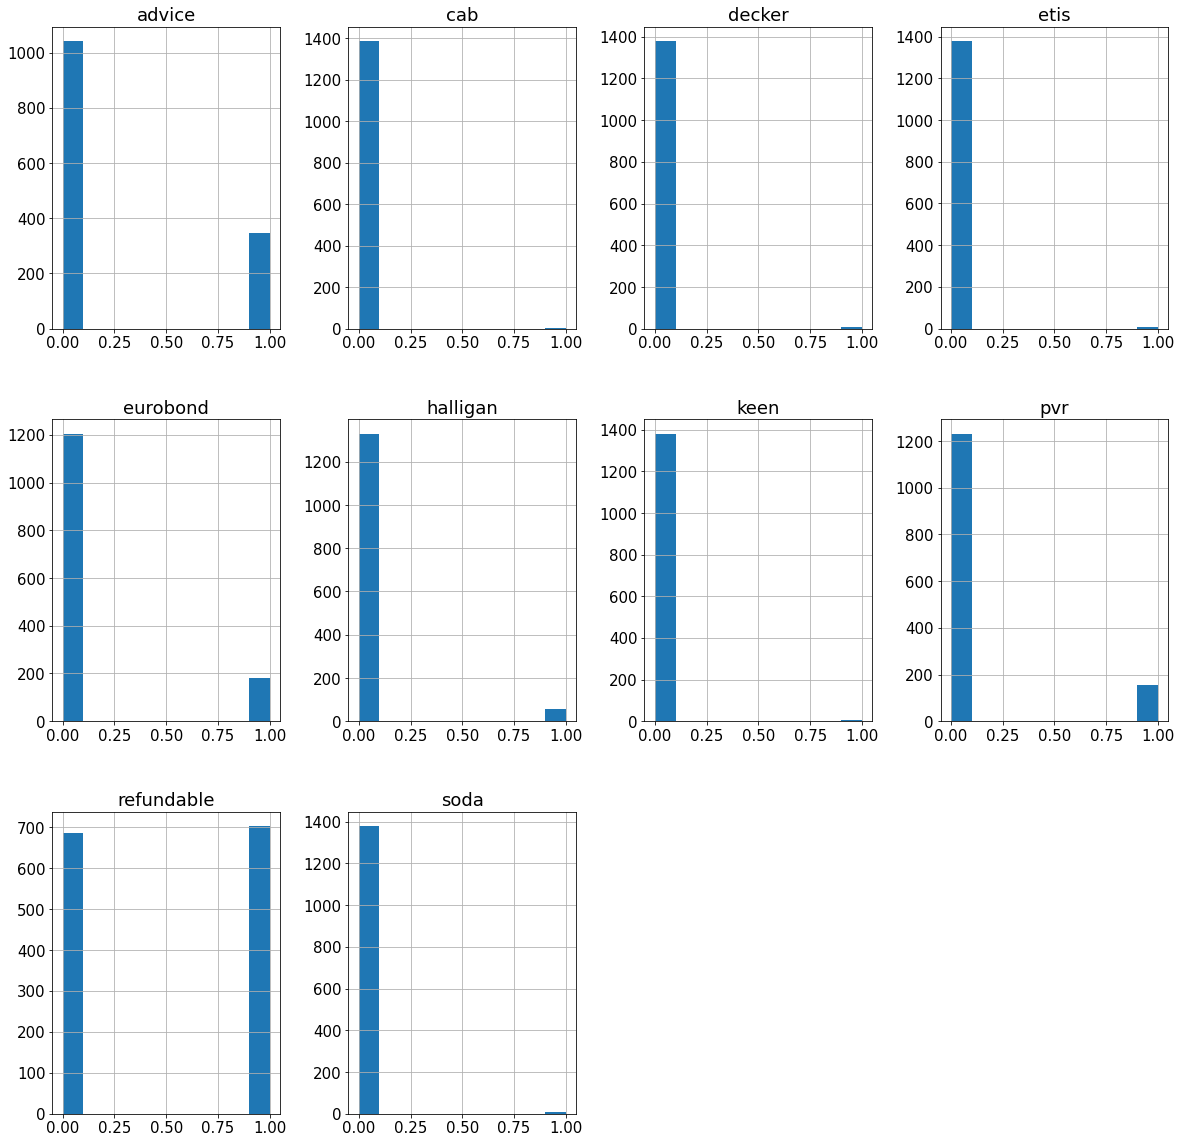

In [13]:
data_t.hist(figsize=(20, 20), layout=(3, 4))
plt.show()

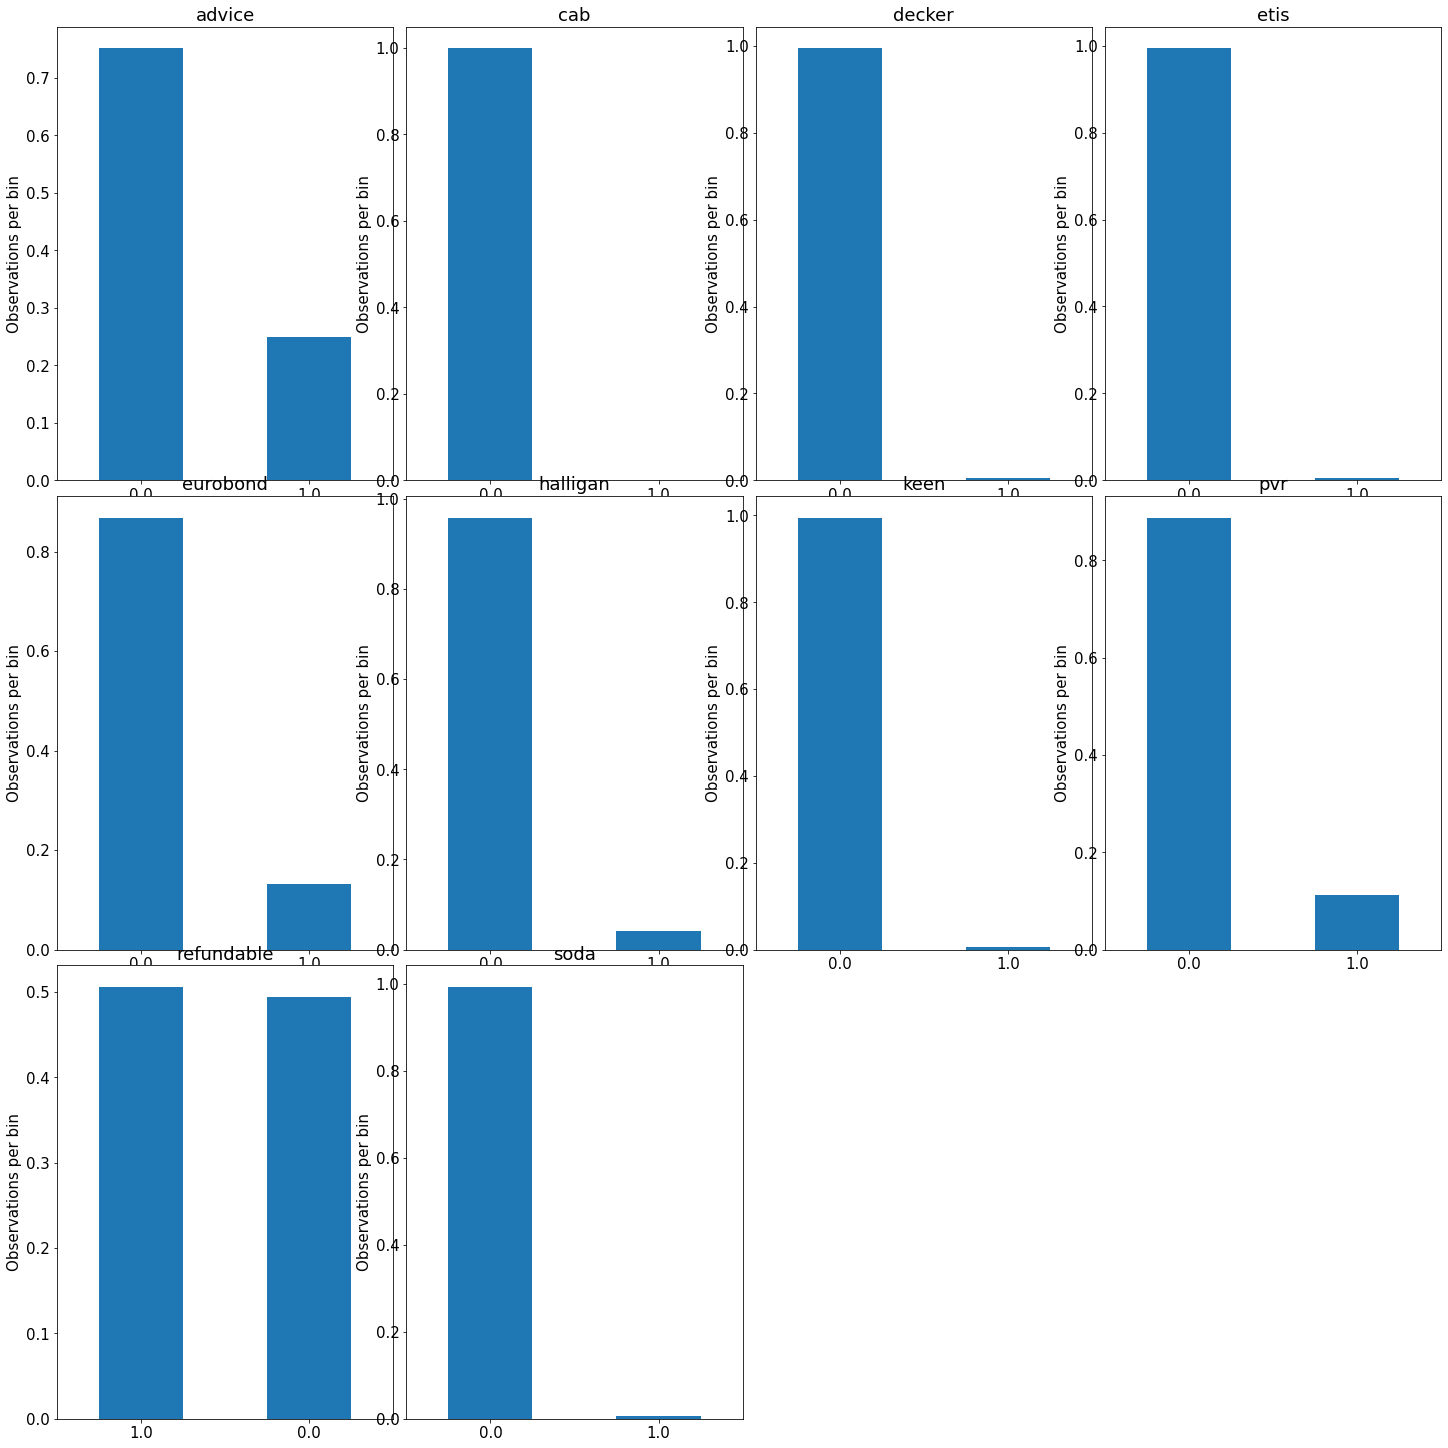

In [14]:
# Let's plot binarized variables:
variables = data_t.columns.to_list()
plt.figure(figsize=(20, 20), constrained_layout=True)

for i in range(10):

    # location in figure
    ax = plt.subplot(3, 4, i + 1)

    # variable to plot
    var = variables[i]

    # determine proportion of observations per bin
    t = data_t[var].value_counts(normalize=True)
    t.plot.bar(ax=ax)

    plt.xticks(rotation=0)
    plt.ylabel("Observations per bin")

    # add variable name as title
    ax.set_title(var)

plt.show()